# Upper-bound Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

pd.options.display.float_format = '{:,.3f}'.format

In [2]:
base_dir = "../trained_models/AT/1000val/full/"
def load_data(train, test, fname, valtest=None) :
    if valtest == None :
        fpath = base_dir + "{}/eval/best/{}/{}.txt".format(train, test, fname)
    else :
        fpath = base_dir + "{}/val/{}/best/{}/{}.txt".format(train, valtest, test, fname)

    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original", 1000)
y_original_pred = load_data(train, test, "Y_original_pred", 1000)
y_adv = load_data(train, test, "Y_adv", 1000)
y_adv_pred = load_data(train, test, "Y_adv_pred", 1000)

In [3]:
def get_robust_data(train, test, valtest=None):
    y_adv = load_data(train, test, "Y_adv", valtest)
    y_adv_pred = load_data(train, test, "Y_adv_pred", valtest)
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test, None)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [3 8 8 ... 5 1 7]


In [4]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [5]:
train = attacks.copy()

test = attacks.copy()
test.append("all")

In [6]:
def get_accuracies(attacks, valtest=None) :
    predictions = {}
    labels = {}

    for a1 in train :
        p = np.array([])
        l = np.array([])
        for a2 in attacks :
            y, y_pred = get_robust_data(a1, a2, valtest)
            p = np.concatenate((p, y_pred))
            l = np.concatenate((l, y))
        predictions[a1] = {}
        labels[a1] = {}
        predictions[a1]["all"] = p
        labels[a1]["all"] = l

    for a1 in train :
        for a2 in attacks :
            y, y_pred = get_robust_data(a1, a2, valtest)
            predictions[a1][a2] = y_pred
            labels[a1][a2] = y

    accs = {}
    for tr in train :
        accs[tr] = {}
        for ts in test :
            accs[tr][ts] = (labels[tr][ts] == predictions[tr][ts]).sum().item() / len(labels[tr][ts])


    accs = pd.DataFrame(data=accs)
    accs_transpose = pd.DataFrame(data=accs).T
    return accs_transpose, accs 

accs_transpose, accs = get_accuracies(attacks, 1000)

In [7]:
accs_transpose

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
autoattack,0.762,0.761,0.755,0.765,0.741,0.759,0.759,0.765,0.766,0.129,0.345,0.664
autopgd,0.751,0.751,0.739,0.757,0.732,0.748,0.755,0.762,0.764,0.132,0.367,0.660
bim,0.778,0.777,0.769,0.785,0.744,0.766,0.778,0.784,0.781,0.135,0.362,0.678
cw,0.762,0.765,0.761,0.803,0.760,0.760,0.791,0.791,0.791,0.112,0.398,0.681
fgsm,0.727,0.726,0.734,0.740,0.736,0.732,0.737,0.739,0.746,0.133,0.332,0.644
pgd,0.753,0.752,0.744,0.755,0.724,0.754,0.744,0.754,0.751,0.149,0.393,0.661
deepfool,0.764,0.764,0.753,0.779,0.741,0.753,0.770,0.765,0.774,0.094,0.384,0.667
newtonfool,0.744,0.744,0.750,0.765,0.732,0.749,0.757,0.770,0.770,0.112,0.349,0.658
squareattack,0.692,0.693,0.696,0.752,0.680,0.682,0.688,0.748,0.815,0.147,0.355,0.632
pixelattack,0.089,0.089,0.089,0.089,0.089,0.089,0.089,0.089,0.089,0.781,0.089,0.152


In [8]:
sorted_acc = accs_transpose.sort_values(by="all", ascending=False)
idx = list(sorted_acc.index)
sorted_acc = sorted_acc.reindex(idx, axis=0)
idx.append("all")
sorted_acc = sorted_acc.reindex(idx, axis=1)
sorted_acc

,cw,bim,deepfool,autoattack,pgd,autopgd,newtonfool,fgsm,squareattack,spatialtransformation,pixelattack,all
cw,0.803,0.761,0.791,0.762,0.760,0.765,0.791,0.760,0.791,0.398,0.112,0.681
bim,0.785,0.769,0.778,0.778,0.766,0.777,0.784,0.744,0.781,0.362,0.135,0.678
deepfool,0.779,0.753,0.770,0.764,0.753,0.764,0.765,0.741,0.774,0.384,0.094,0.667
autoattack,0.765,0.755,0.759,0.762,0.759,0.761,0.765,0.741,0.766,0.345,0.129,0.664
pgd,0.755,0.744,0.744,0.753,0.754,0.752,0.754,0.724,0.751,0.393,0.149,0.661
autopgd,0.757,0.739,0.755,0.751,0.748,0.751,0.762,0.732,0.764,0.367,0.132,0.660
newtonfool,0.765,0.750,0.757,0.744,0.749,0.744,0.770,0.732,0.770,0.349,0.112,0.658
fgsm,0.740,0.734,0.737,0.727,0.732,0.726,0.739,0.736,0.746,0.332,0.133,0.644
squareattack,0.752,0.696,0.688,0.692,0.682,0.693,0.748,0.680,0.815,0.355,0.147,0.632
spatialtransformation,0.519,0.494,0.498,0.488,0.496,0.487,0.519,0.485,0.537,0.811,0.114,0.495


In [9]:
acc_val = get_accuracies(attacks, 1000)[0]
acc_test = get_accuracies(attacks, None)[0]

acc_val = acc_val.reindex(idx[:-1], axis=0)
acc_val = acc_val.reindex(idx, axis=1)
acc_test = acc_test.reindex(idx[:-1], axis=0)
acc_test = acc_test.reindex(idx, axis=1)

diff = abs(acc_val - acc_test)

In [10]:
def plot_heatmap(metrics, cmap, fpath, vmin, vmax, annot=True): 

    df = pd.DataFrame(data=metrics)

    plt.figure(figsize=(12,9))
    fig = sns.heatmap(df, cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=".3f", linewidth=0.7)
#     fig.set(xlabel='Test', ylabel='Train', fontsize=18)
    plt.xlabel('Test', fontsize=16)
    plt.ylabel('Train', fontsize=16)
    fig.figure.savefig(fpath, bbox_inches='tight')
    plt.show()

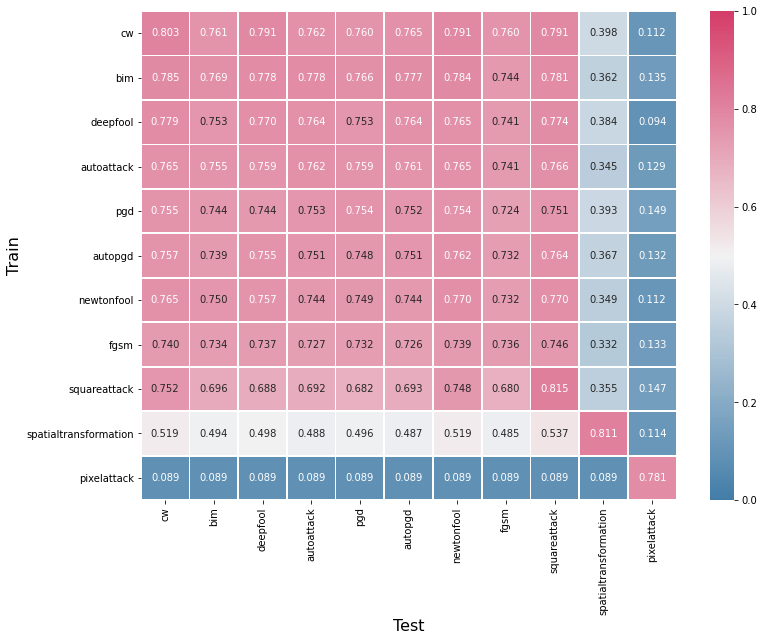

In [11]:
path = "plot/at-accuracy-validation.png"

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)
plot_heatmap(sorted_acc.drop(columns=["all"]), cmap, path, 0, 1)

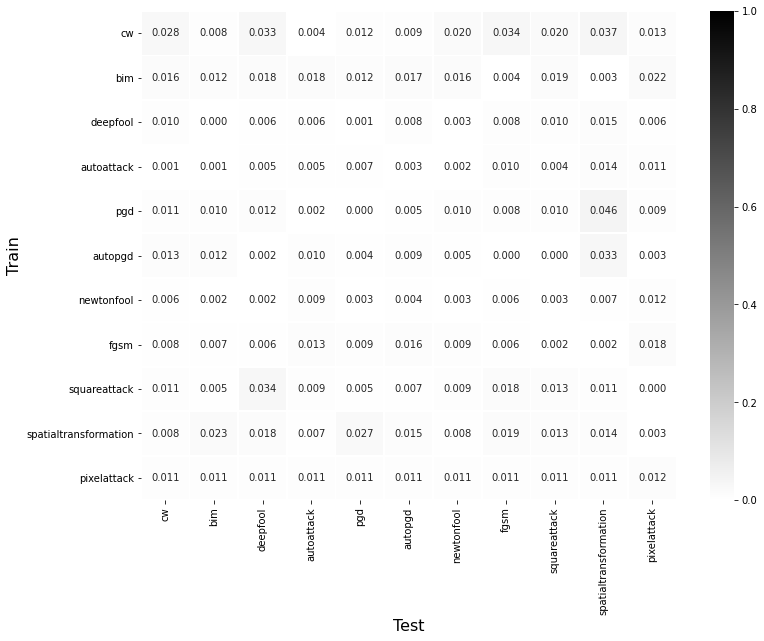

In [12]:
path = "plot/at-diff-accuracy.png"

# cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)
cmap = "gray_r"
plot_heatmap(abs(diff).drop(columns=["all"]), cmap, path, 0, 1)

In [13]:
# print(sorted_acc.to_latex(bold_rows=True))

In [14]:
accs_transpose, accs = get_accuracies(attacks, None)

In [15]:
cluster = {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}
cluster

{0: ['autoattack',
  'autopgd',
  'bim',
  'cw',
  'fgsm',
  'pgd',
  'deepfool',
  'newtonfool',
  'squareattack'],
 1: ['pixelattack'],
 2: ['spatialtransformation']}

In [16]:
attacks

['autoattack',
 'autopgd',
 'bim',
 'cw',
 'fgsm',
 'pgd',
 'deepfool',
 'newtonfool',
 'squareattack',
 'pixelattack',
 'spatialtransformation']

In [17]:
# def measure_inter_similarity(arr) :

def inter_similarity_the_same_train(arr) :
    if len(arr) <= 1 :
        return [0]
    res = []
    for i in range(len(arr)) :
        x1 = arr[i]
        for j in range(i+1, len(arr)) :
            x2 = arr[j]
            if x1 != x2 :
                for train in attacks :
                    val = abs(accs[train][x1] - accs[train][x2])
                    res.append(val)
    return res

def inter_similarity_the_same_test(arr) :
    if len(arr) <= 1 :
        return [0]
    res = []
    for i in range(len(arr)) :
        x1 = arr[i]
        for j in range(i+1, len(arr)) :
            x2 = arr[j]
            if x1 != x2 :
                for test in attacks :
                    val = abs(accs[x1][test] - accs[x2][test])
                    res.append(val)
    return res



In [18]:
len(inter_similarity_the_same_train(cluster[0]))

396

In [19]:
len(inter_similarity_the_same_test(cluster[0]))

396

In [20]:
data = {}
data["inter_similarity_train"] = inter_similarity_the_same_train(cluster[0])
data["inter_similarity_test"] = inter_similarity_the_same_test(cluster[0])

In [21]:
def outer_difference_the_same_train(cluster) :
    res = []
    calculated = set()
    for k1, v1 in cluster.items() :
        for k2, v2 in cluster.items() :
            if k1 != k2 :
                for a1 in v1 : 
                    for a2 in v2 :
                        idx = a1 + "-" + a2
                        if idx not in calculated :
                            for train in attacks :
                                val = abs(accs[train][a1] - accs[train][a2])
                                res.append(val)
        
                                calculated.add(idx)
                                calculated.add(a2 + "-" + a1)
    return res

In [23]:
len(outer_difference_the_same_train(cluster))

209

In [24]:
def outer_difference_the_same_test(cluster) :
    res = []
    calculated = set()
    for k1, v1 in cluster.items() :
        for k2, v2 in cluster.items() :
            if k1 != k2 :
                for a1 in v1 : 
                    for a2 in v2 :
                        idx = a1 + "-" + a2
                        if idx not in calculated :
                            for test in attacks :
                                val = abs(accs[a1][test] - accs[a2][test])
                                res.append(val)
        
                                calculated.add(idx)
                                calculated.add(a2 + "-" + a1)
    return res

In [25]:
len(outer_difference_the_same_test(cluster))

209

In [26]:
data["outer_difference_train"] = outer_difference_the_same_train(cluster)
data["outer_difference_test"] = outer_difference_the_same_test(cluster)

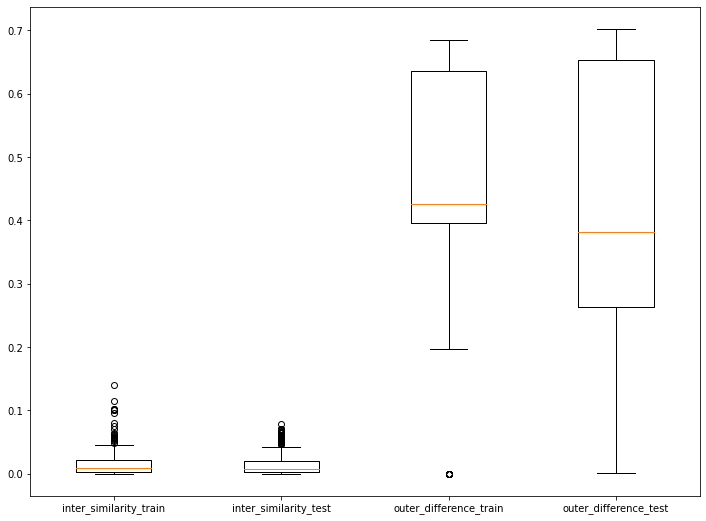

In [27]:
fig, ax = plt.subplots(figsize=(12,9))
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
fpath = "plot/at-detail-similarity.png"
fig.savefig(fpath, bbox_inches='tight')